In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image



Using TensorFlow backend.


In [0]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Untitled folder/chest_xray.zip', 'r') as zip_ref:
  zip_ref.extractall('')

In [0]:
#we need to argument our data coz our training dataset is not suffiecient to build the model......for argumentation of train data we use imageGenerator
train_data_dir  = '/content/chest_xray/train'
validation_data_dir = '/content/chest_xray/test'

epochs = 10
batch_size = 16


#what the operator to perform,what we want to do with our data
train_datagen = ImageDataGenerator(
                                   rescale = 1. /255,       #to avoid shadow,lighting,variance
                                   shear_range = 0.2,      #to compress the image
                                   zoom_range = 0.2,        # to zoom it from centre
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale =1./ 255)

#other than generator we use csv
#in this we generate from train_datagen(directory),and we loading the data
train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    target_size = (256,256),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary')

 #here the color mode was default set as(Rgb) we want change to grey  we should mention (color_mode = 'gray')

validation_generator = test_datagen.flow_from_directory(
                                                    validation_data_dir,
                                                    target_size = (256,256),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
import cv2
#here we are reading only one image   if we mention 0 at last it will take grey scale
img = cv2.imread('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg', 0)

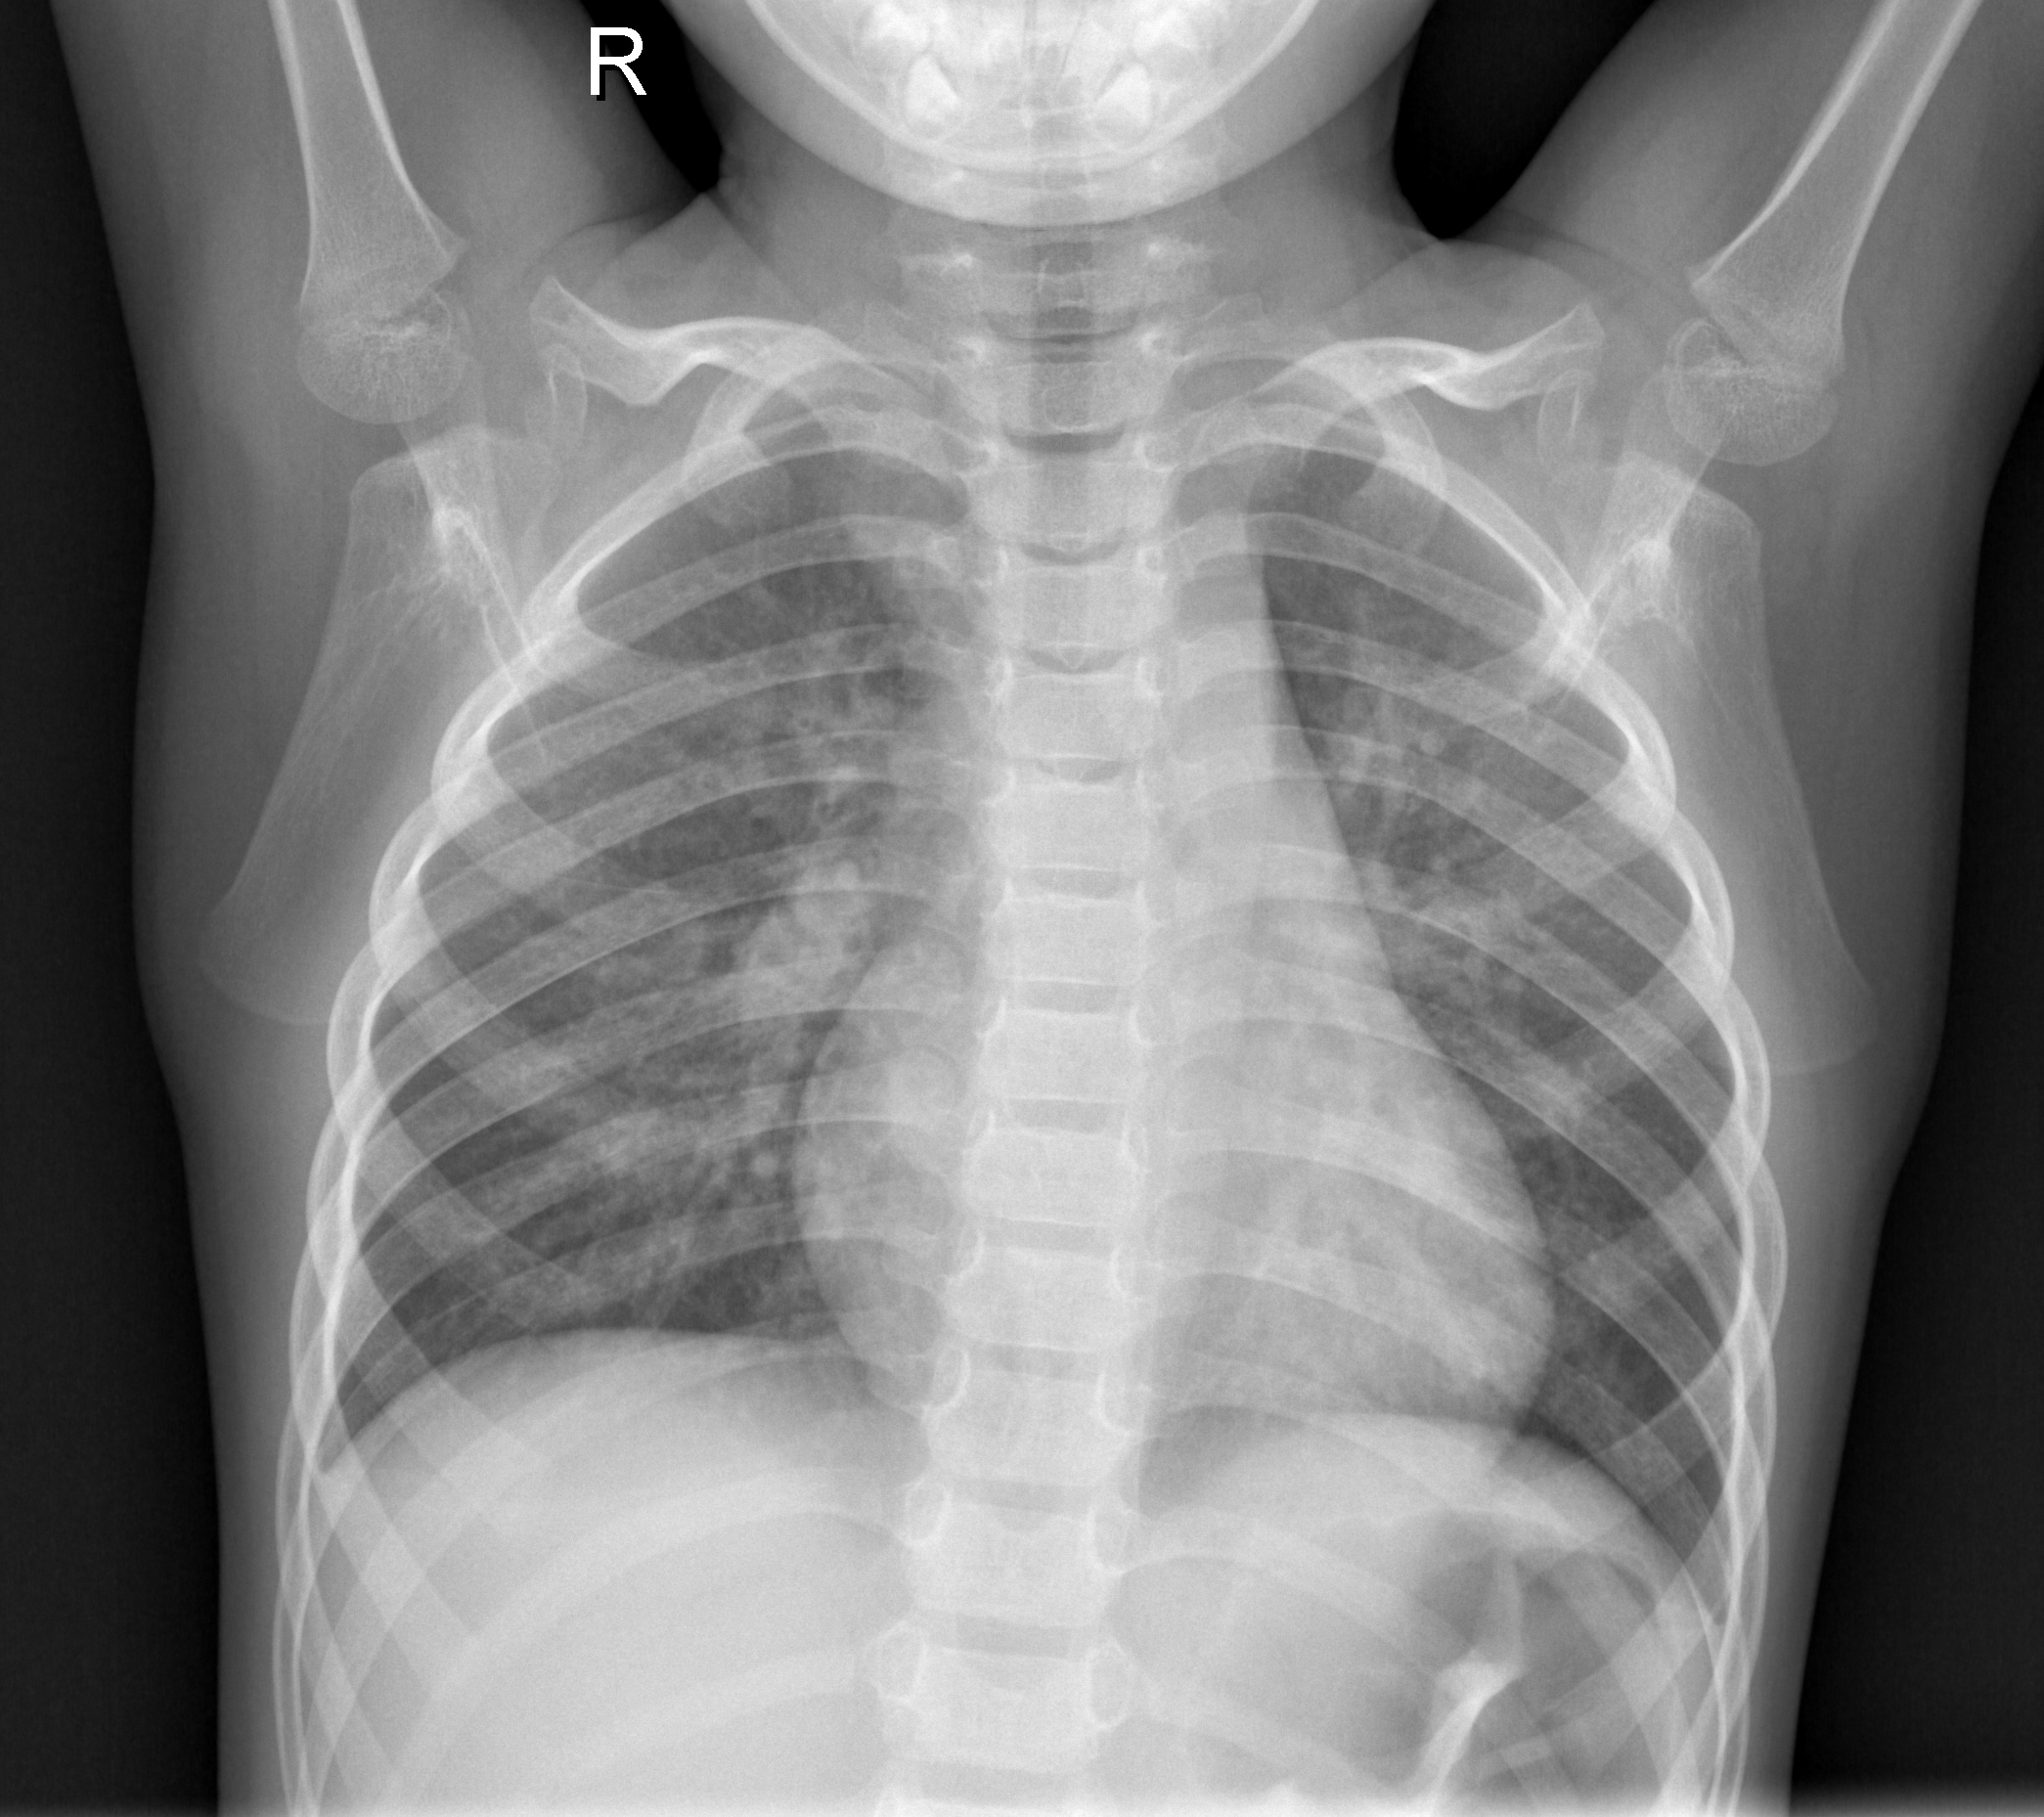

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [0]:
model = Sequential()

#model.add(Conv2D(no.of filter, shape of filter, padding, activation, input_shape))
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (256, 256, 3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 127, 127, 32)      9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 32)       

In [0]:
#compile the keras model    #so its binary we use binary_crossentropy..if it is multiclass we use categorical_crossentropy
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit_generator(
                    train_generator,
                    steps_per_epoch = train_generator.n // batch_size,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.n // batch_size) 

                    #steps_per_epoch mean in how many steps you want to send
                    #ex= we have 100 and batch size is 10
                    #so steps_per_epoch is 100/10 = 10

Epoch 1/10
326/326 [==============================] - 125s 383ms/step - loss: 0.3918 - acc: 0.8292 - val_loss: 0.3887 - val_acc: 0.8365
Epoch 2/10
326/326 [==============================] - 115s 353ms/step - loss: 0.2603 - acc: 0.8921 - val_loss: 0.3420 - val_acc: 0.8750
Epoch 3/10
326/326 [==============================] - 113s 348ms/step - loss: 0.2096 - acc: 0.9202 - val_loss: 0.6728 - val_acc: 0.7692
Epoch 4/10
326/326 [==============================] - 112s 343ms/step - loss: 0.2076 - acc: 0.9214 - val_loss: 0.4033 - val_acc: 0.8510
Epoch 5/10
326/326 [==============================] - 111s 342ms/step - loss: 0.1856 - acc: 0.9294 - val_loss: 0.4029 - val_acc: 0.8606
Epoch 6/10
326/326 [==============================] - 111s 340ms/step - loss: 0.1595 - acc: 0.9415 - val_loss: 0.4229 - val_acc: 0.8542
Epoch 7/10
326/326 [==============================] - 111s 340ms/step - loss: 0.1765 - acc: 0.9379 - val_loss: 0.6577 - val_acc: 0.7564
Epoch 8/10
326/326 [============================

In [0]:
img = cv2.imread('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg', 0)

In [0]:
import numpy as np
import os

A=[]
path = 'chest_xray/test'
for i in os.listdir(path):   #we are test value mean normal and neumonia
  try:
    for j in os.listdir(path+'/'+i)[:100]:  #it will take the names inside the normal and neumonia
      img = image.load_img(path+'/'+i+'/'+j, target_size = (256,256))
      A.append(np.array(img)/255)
  except:
      pass


In [0]:
A = np.array(A)

In [0]:
A.shape

(200, 256, 256, 3)

In [0]:
#A=np.expand_dims(A, axis = 1)

In [0]:
model.predict_classes(A)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    